In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [54]:
df=pd.read_csv("heart.csv")

In [6]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [11]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Text(0, 0.5, 'Cholesterol')

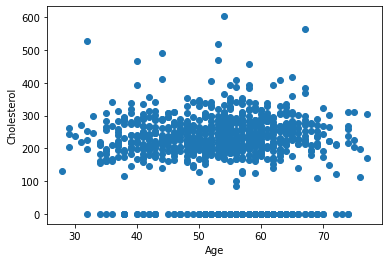

In [18]:
plt.scatter(df["Age"],df["Cholesterol"])
plt.xlabel("Age")
plt.ylabel("Cholesterol")

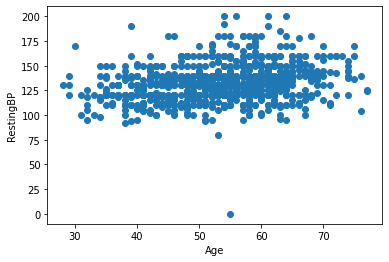

In [19]:
plt.scatter(df['Age'], df['RestingBP'])
plt.xlabel('Age')
plt.ylabel('RestingBP')
plt.show()

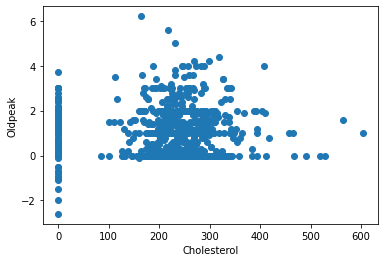

In [27]:
plt.scatter(df['Cholesterol'], df['Oldpeak'])
plt.xlabel('Cholesterol')
plt.ylabel('Oldpeak')
plt.show()

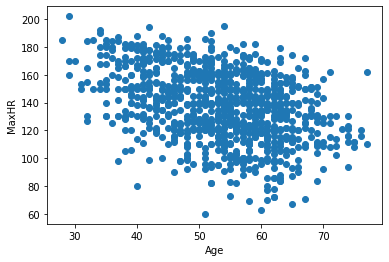

In [29]:
plt.scatter(df['Age'], df['MaxHR'])
plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.show()

k-mean clustering

In [23]:
df1 = df.loc[:,["Age","Cholesterol"]]
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters=2)
kmeans1.fit(df1)
labels1 = kmeans1.predict(df1)

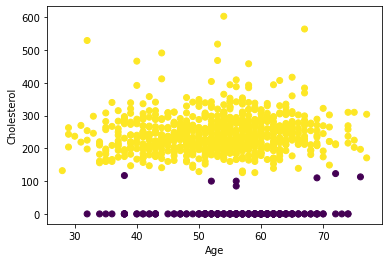

In [24]:
plt.scatter(df['Age'], df['Cholesterol'],c=labels1)
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

In [32]:
df2 = df.loc[:, ['Age', 'HeartDisease']]
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(data2)
labels2 = kmeans2.predict(data2)

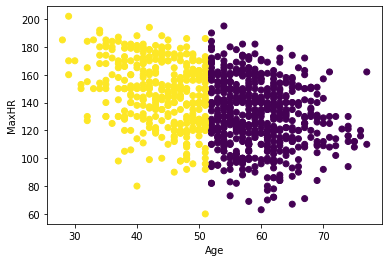

In [30]:
plt.scatter(df['Age'], df['MaxHR'],c=labels2)
plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.show()

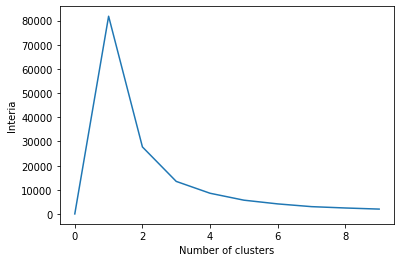

In [31]:
list_iner = np.empty(10)
for i in range(1,10):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(data2)
    list_iner[i] = kmeans2.inertia_
    
plt.plot(range(0,10),list_iner,'-')
plt.xlabel("Number of clusters")
plt.ylabel("Interia")
plt.show()

In [35]:
df3=df.drop("HeartDisease",axis=1)

In [36]:
df3

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


Encoding

In [39]:
# check for categorical attributes
categorical_col = []
for x in df3.dtypes.index:
    if df3.dtypes[x] == 'object':
        categorical_col.append(x)
categorical_col

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_col:
    df3[col] = le.fit_transform(df[col])

In [42]:
df3

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

sscaler = StandardScaler()
kmeans_model = KMeans(n_clusters=4)
pipeline = make_pipeline(sscaler, kmeans_model)
pipeline.fit(df3)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4))])

In [55]:
labels = pipeline.predict(df3)
df4 = pd.DataFrame({'labels':labels, 'Outcome':df['HeartDisease']})
matrix = pd.crosstab(df4['labels'],df4['Outcome'])
matrix

Outcome,0,1
labels,,
0,136,20
1,224,69
2,22,169
3,28,250
